In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Citirea setului de date PIMA
df = pd.read_csv('diabetes.csv')

# Afișarea primelor rânduri pentru a verifica structura datelor
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


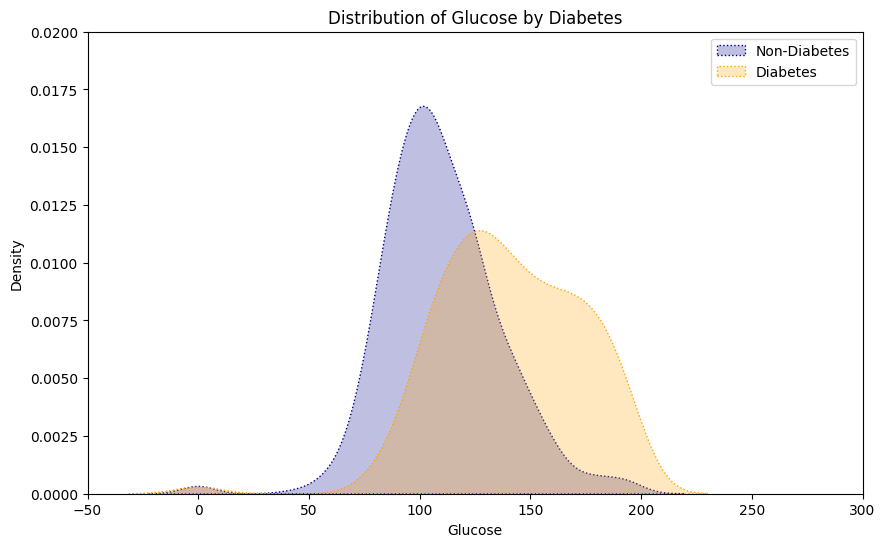

In [5]:
plt.figure(figsize=(10, 6))

# Distribuția glucozei pentru non-diabetici (Outcome = 0)
sns.kdeplot(data=df[df['Outcome'] == 0], x='Glucose', color='darkblue', linestyle=':', fill=True, label='Non-Diabetes')

# Distribuția glucozei pentru diabetici (Outcome = 1)
sns.kdeplot(data=df[df['Outcome'] == 1], x='Glucose', color='orange', linestyle=':', fill=True, label='Diabetes')

plt.title('Distribution of Glucose by Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.xlim(-50, 300)
plt.ylim(0,0.02)
plt.legend()
plt.show()

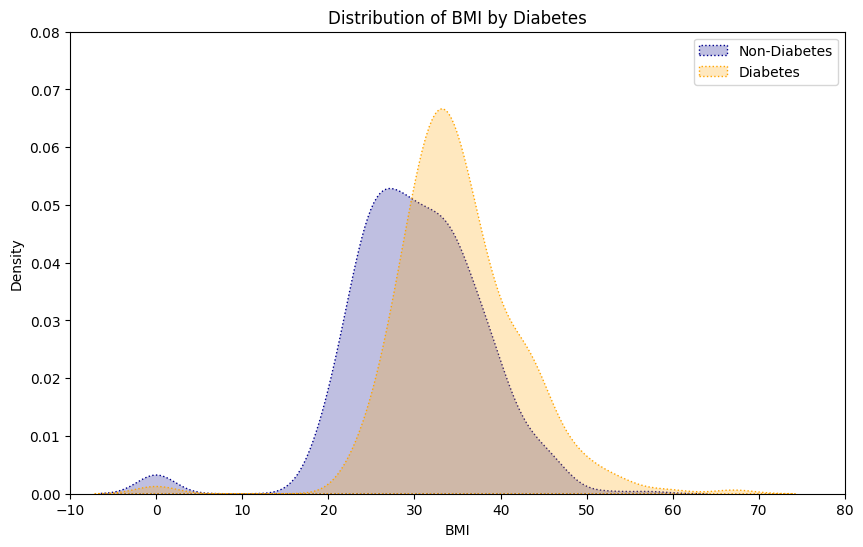

In [6]:
plt.figure(figsize=(10, 6))

# BMI distribution for non-diabetics (Outcome = 0)
sns.kdeplot(data=df[df['Outcome'] == 0], x='BMI', color='darkblue', linestyle=':', fill=True, label='Non-Diabetes')

# BMI distribution for diabetics (Outcome = 1)
sns.kdeplot(data=df[df['Outcome'] == 1], x='BMI', color='orange', linestyle=':', fill=True, label='Diabetes')

plt.title('Distribution of BMI by Diabetes')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.xlim(-10, 80)
plt.ylim(0,0.08)
plt.legend()
plt.show()


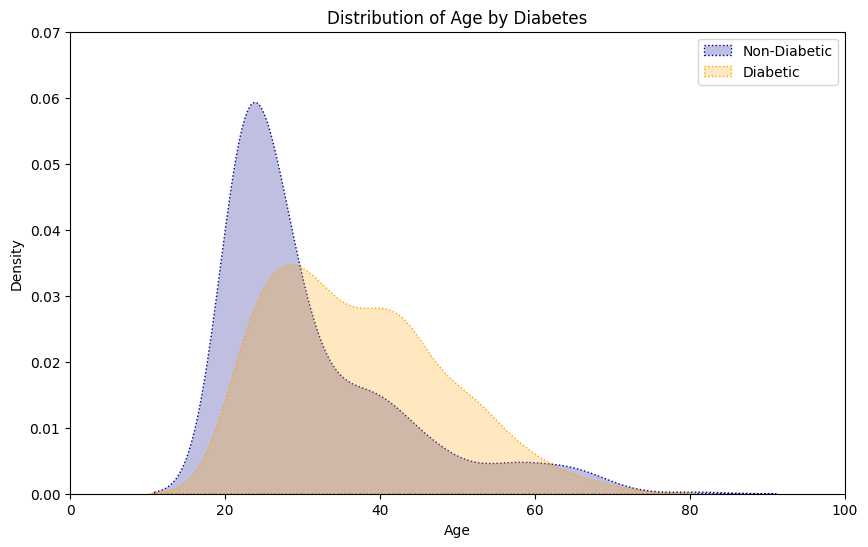

In [7]:
plt.figure(figsize=(10, 6))

# Age distribution for non-diabetics (Outcome = 0)
sns.kdeplot(data=df[df['Outcome'] == 0], x='Age', color='darkblue', linestyle=':', fill=True, label='Non-Diabetic')

# Age distribution for diabetics (Outcome = 1)
sns.kdeplot(data=df[df['Outcome'] == 1], x='Age', color='orange', linestyle=':', fill=True, label='Diabetic')

plt.title('Distribution of Age by Diabetes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.ylim(0, 0.07)
plt.legend()
plt.show()


In [8]:
from factor_analyzer import FactorAnalyzer
import pandas as pd



# Verificarea pentru valori lipsă și completarea sau eliminarea lor
df.dropna(inplace=True)

# Realizarea analizei factoriale
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df)

# Obținerea încărcăturilor factoriale
loadings = fa.loadings_

# Crearea DataFrame-ului pentru încărcăturile factoriale
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=['ML1', 'ML2', 'ML3', 'ML4'])

# Calcularea ss loadings, proportion variance și cumulative variance
ss_loadings = loadings_df.apply(lambda x: sum(x**2), axis=0)
prop_var = ss_loadings / len(df.columns)
cum_var = prop_var.cumsum()

# Adăugarea acestor variabile în DataFrame
summary_df = pd.DataFrame({
    'ss loadings': ss_loadings,
    'Proportion Var': prop_var,
    'Cumulative Var': cum_var
}).transpose()

# Concatenarea încărcăturilor factoriale și a variabilelor calculate
final_df = pd.concat([loadings_df, summary_df])

# Afișarea tabelului rezultat
print(final_df)


                               ML1       ML2       ML3       ML4
Pregnancies               0.559701  0.123908 -0.067464  0.002085
Glucose                   0.218584  0.477450  0.247108  0.105746
BloodPressure             0.253001  0.003428  0.033486  0.416196
SkinThickness            -0.145940  0.023740  0.314092  0.573141
Insulin                  -0.065559  0.152088  0.967402  0.189231
BMI                      -0.009215  0.259687  0.037207  0.657308
DiabetesPedigreeFunction -0.022089  0.176035  0.145997  0.160373
Age                       0.936342  0.111769  0.002463  0.027459
Outcome                   0.151081  0.898262 -0.011863  0.101975
ss loadings               1.350785  1.184812  1.124101  1.017630
Proportion Var            0.150087  0.131646  0.124900  0.113070
Cumulative Var            0.150087  0.281733  0.406633  0.519703


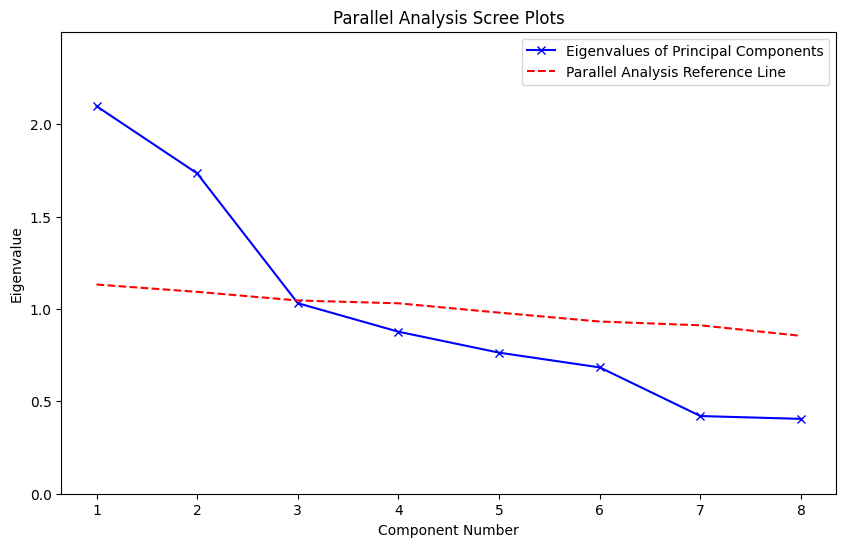

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random


features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df.loc[:, features].values
y = df.loc[:, ['Outcome']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

random_data = np.random.normal(size=x.shape)
random_pca = PCA(n_components=8)
random_pca.fit(random_data)
parallel_analysis_values = random_pca.explained_variance_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'x-', color='blue', label='Eigenvalues of Principal Components')
plt.plot(range(1, len(parallel_analysis_values) + 1), parallel_analysis_values, 'r--', label='Parallel Analysis Reference Line')
plt.title('Parallel Analysis Scree Plots')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 9))  # Setăm intervalul axei X de la 1 la 8
plt.yticks(np.arange(0, 2.5, 0.5))  # Setăm intervalul axei Y de la 0 la 5 cu pas de 0.5
plt.ylim(0, 2.5)  # Setăm limitele axei Y de la 0 la 5
plt.legend()
plt.show()
